In [10]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))



df = pd.read_csv(os.path.join(os.getcwd(), "../../data/total_4am.csv"), index_col=0)


In [11]:
import pandas as pd
from performance import get_performance, draw_graph

def various_momentum(momentum_list, df):

    original_df = df.copy()  # Make a copy of the original DataFrame

    for momentum in momentum_list:
        df = original_df.copy()  # Create a fresh copy for each momentum

        df[f"{momentum}_momentum"] = 0

        # Implement RSI strategy for long positions only
        df['signal'] = 0  # Default to no position
        for i in range(200, len(df)):
            df.loc[i, f"{momentum}_momentum"] = df.loc[i, "close"] - df.loc[i-momentum, "close"]
            # Buy condition
            if df[f'{momentum}_momentum'].iloc[i] >= 0 and df[f'{momentum}_momentum'].iloc[i-1] < 0:
                df.loc[i, 'signal'] = 1
            # Sell condition
            elif df[f'{momentum}_momentum'].iloc[i] < 0 and df[f'{momentum}_momentum'].iloc[i-1] >= 0:
                df.loc[i, 'signal'] = -1

        # Manage positions with stop loss, take profit, and sell signal
        df['position'] = 0
        df['highest_price'] = np.nan
        df['exit_price'] = np.nan
        holding_position = False

        for i in range(1, len(df)):
            if df['signal'].iloc[i] == 1 and not holding_position:
                # Enter position
                df.loc[i, 'position'] = 1
                df.loc[i, 'highest_price'] = df.loc[i, 'close']
                holding_position = True
            elif holding_position:
                # Calculate percentage change since entry
                # df['highest_price'].iloc[i] = max(df['highest_price'].iloc[i-1], df['close'].iloc[i])
                df.loc[i, 'highest_price'] = max(df.loc[i-1, 'highest_price'], df.loc[i-1, 'close'])
                highest_price = df['highest_price'].iloc[i]
                current_price = df['close'].iloc[i]
                percent_change = (current_price - highest_price) / highest_price * 100

                if df['signal'].iloc[i] == -1:  # Sell signal condition
                    # print(f"cond1 on{i}")
                    df.loc[i, 'position'] = 0
                    df.loc[i, 'exit_price'] = current_price
                    holding_position = False
                # elif percent_change <= -5:  # Stop loss condition
                #     # print(f"cond2 on{i}")
                #     df.loc[i, 'position'] = 0
                #     df.loc[i, 'exit_price'] = current_price
                #     holding_position = False
                else:
                    # Continue holding the position if no sell conditions are met
                    df.loc[i, 'position'] = df.loc[i-1, 'position']

            else:
                # No signal and no position
                # df['position'].iloc[i] = df['position'].iloc[i-1]
                df.loc[i, 'position'] = df.loc[i-1, 'position']
                
        # Calculate the strategy returns (only when in a long position)
        df['strategy_returns'] = df['position'].shift(1) * df['close'].pct_change()

        df['strategy_returns2'] = df['strategy_returns']
        
        for i in range(1, len(df)):
            buy_price = df.loc[i-1, "close"]
            buy_price_copy = buy_price
            sell_price = df.loc[i, "close"]
            sell_price_copy = sell_price
            if df.loc[i-1, 'position'] == 1 and df.loc[i-1, 'signal'] == 1:
                # df.loc[i, 'strategy_returns2'] = (df.loc[i,'position'])/(df.loc[i-1, 'position'] * 1.002) -1
                buy_price = df.loc[i-1, "close"] * 1.002
            if df.loc[i, 'position'] == 0 and df.loc[i-1, 'position'] != 0:
                # df.loc[i, 'strategy_returns2'] = (df.loc[i,'position'] * 0.998)/(df.loc[i-1, 'position']) -1
                sell_price = df.loc[i, "close"] * 0.998
            
            if buy_price == buy_price_copy and sell_price == sell_price_copy:
                continue


            df.loc[i, "strategy_returns2"] = sell_price/buy_price - 1

        df['cumulative_returns'] = (1 + df['strategy_returns']).cumprod()

        df["cumulative_returns2"] = (1 + df['strategy_returns2']).cumprod()

        # Calculate the benchmark cumulative returns (buy and hold strategy)
        df['benchmark_returns'] = (1 + df['close'].pct_change()).cumprod()

        # Save the results to a CSV file
        df.to_csv(f"../../results/momentum/simple_mmt_{(momentum)}.csv")

        # Get performance metrics and plot the results
        get_performance(df=df, title=f"simple_mmt_{momentum}")
        draw_graph(df=df)

        
    df = original_df.copy()  # Create a fresh copy for each momentum


======Investment Summary======
Strategy        : simple_mmt_30
total_return    : 104.7
cagr            : 30.12
mdd             : 28.02
total_return_w_fee : 75.83
cagr_w_fee      : 23.05
mdd_w_fee       : 30.14
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 993


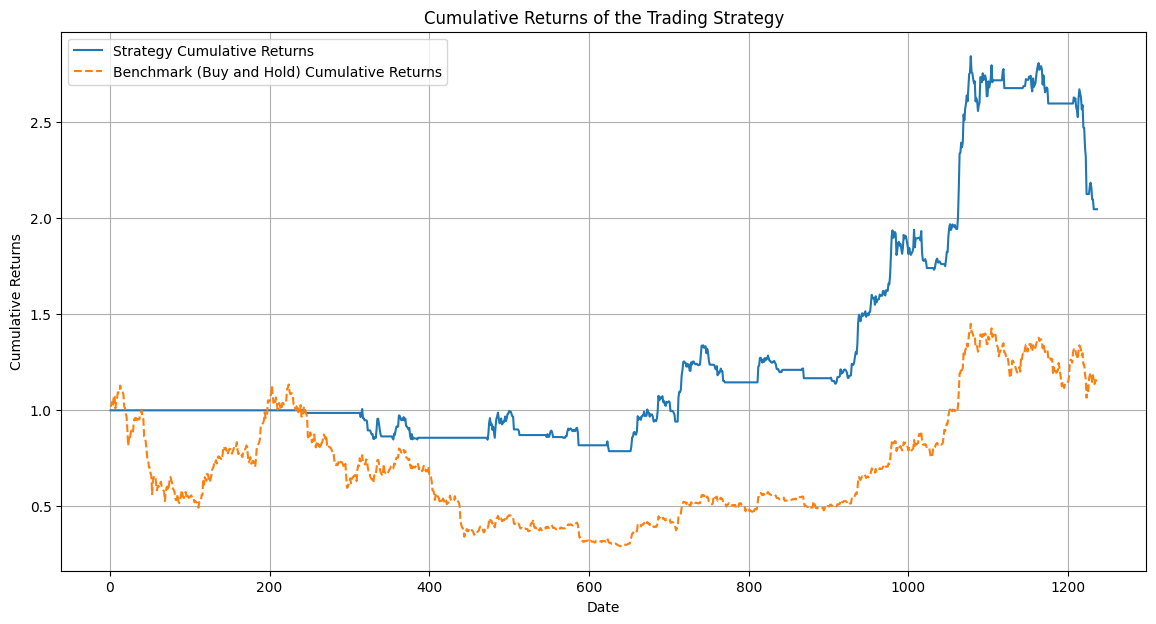

======Investment Summary======
Strategy        : simple_mmt_60
total_return    : 73.32
cagr            : 25.18
mdd             : 38.31
total_return_w_fee : 60.64
cagr_w_fee      : 21.35
mdd_w_fee       : 40.14
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 894


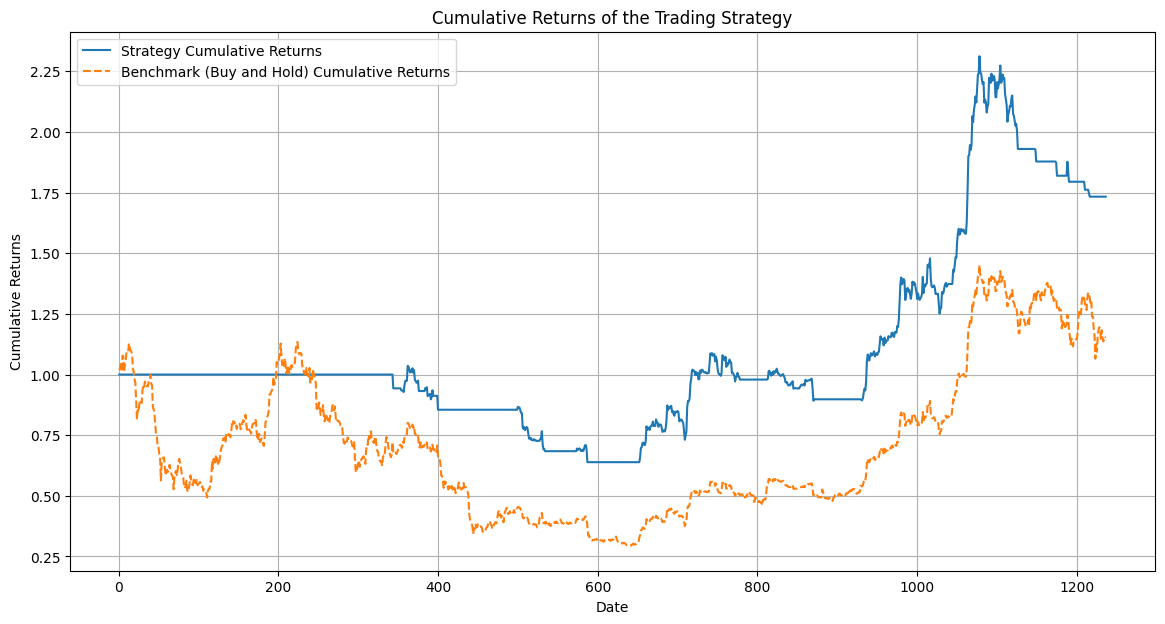

======Investment Summary======
Strategy        : simple_mmt_90
total_return    : 72.09
cagr            : 25.61
mdd             : 32.85
total_return_w_fee : 57.59
cagr_w_fee      : 21.05
mdd_w_fee       : 36.15
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 869


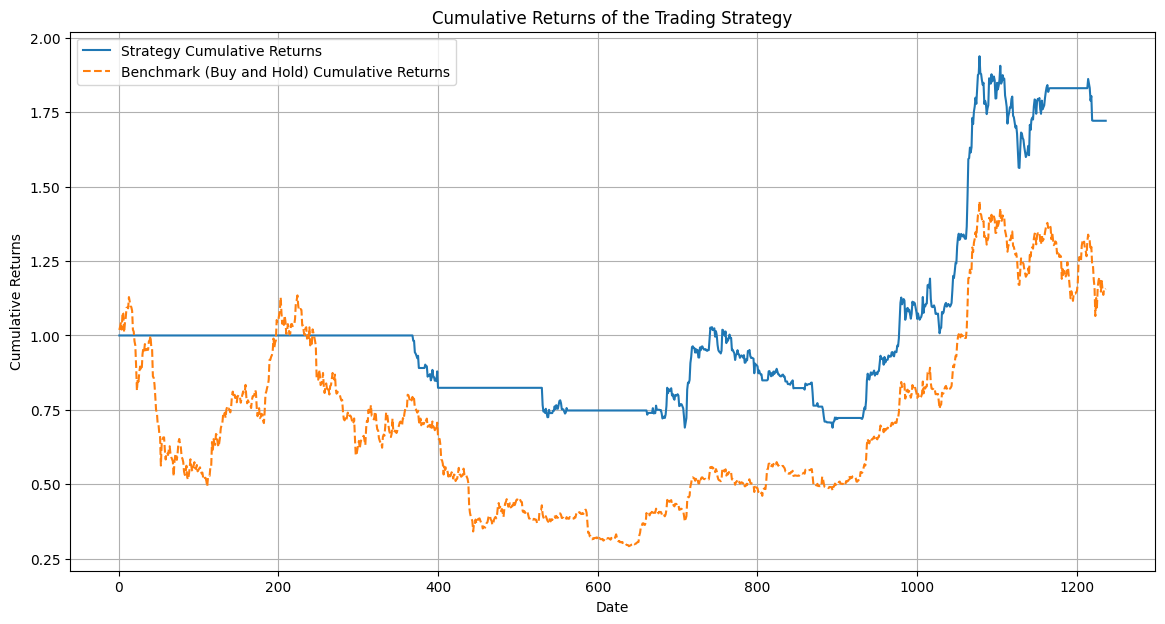

======Investment Summary======
Strategy        : simple_mmt_120
total_return    : 165.76
cagr            : 69.65
mdd             : 19.55
total_return_w_fee : 156.37
cagr_w_fee      : 66.37
mdd_w_fee       : 20.35
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 675


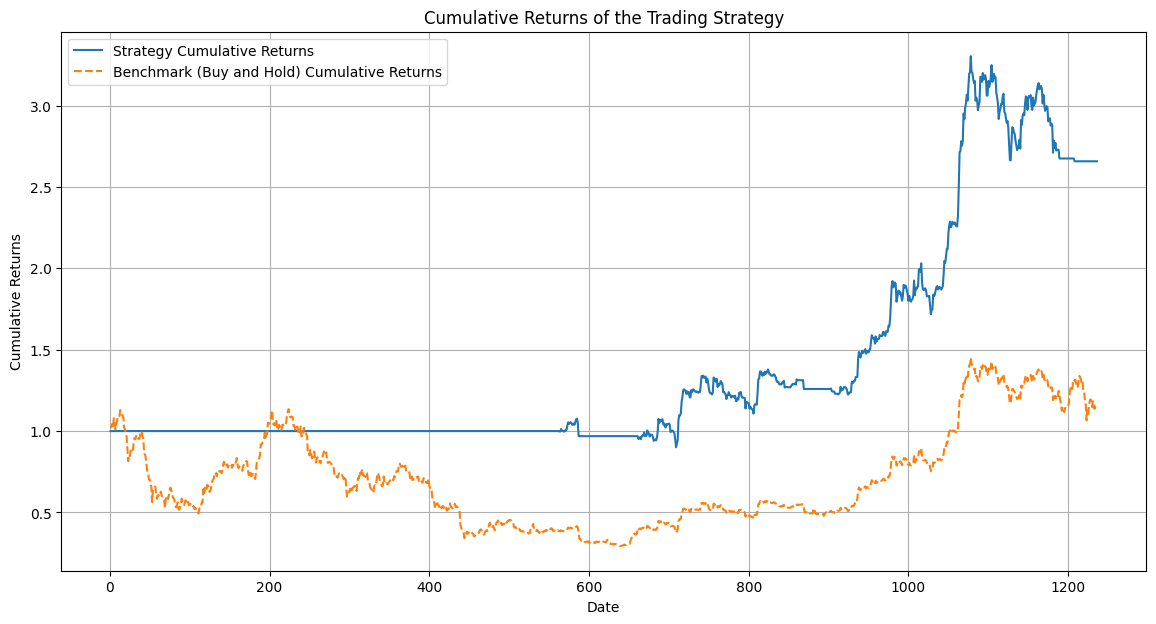

======Investment Summary======
Strategy        : simple_mmt_150
total_return    : 180.26
cagr            : 50.44
mdd             : 23.05
total_return_w_fee : 172.52
cagr_w_fee      : 48.78
mdd_w_fee       : 23.05
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 921


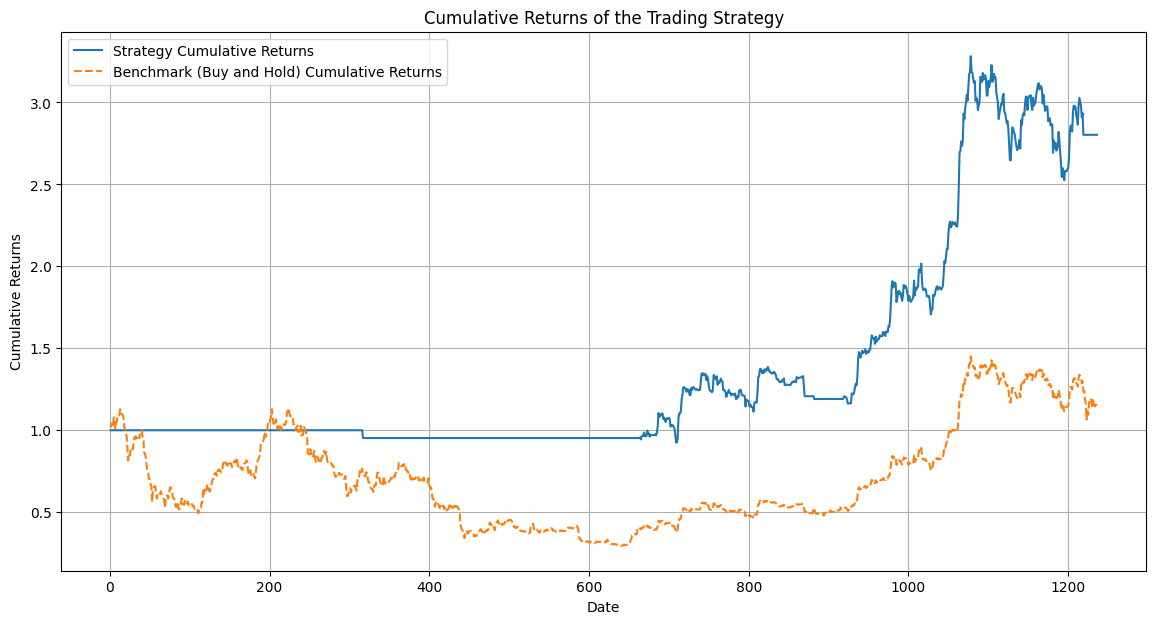

======Investment Summary======
Strategy        : simple_mmt_180
total_return    : 123.79
cagr            : 36.91
mdd             : 26.56
total_return_w_fee : 115.45
cagr_w_fee      : 34.89
mdd_w_fee       : 26.56
investing_days is not a float. It's <class 'numpy.int64'>
investing_days  : 936


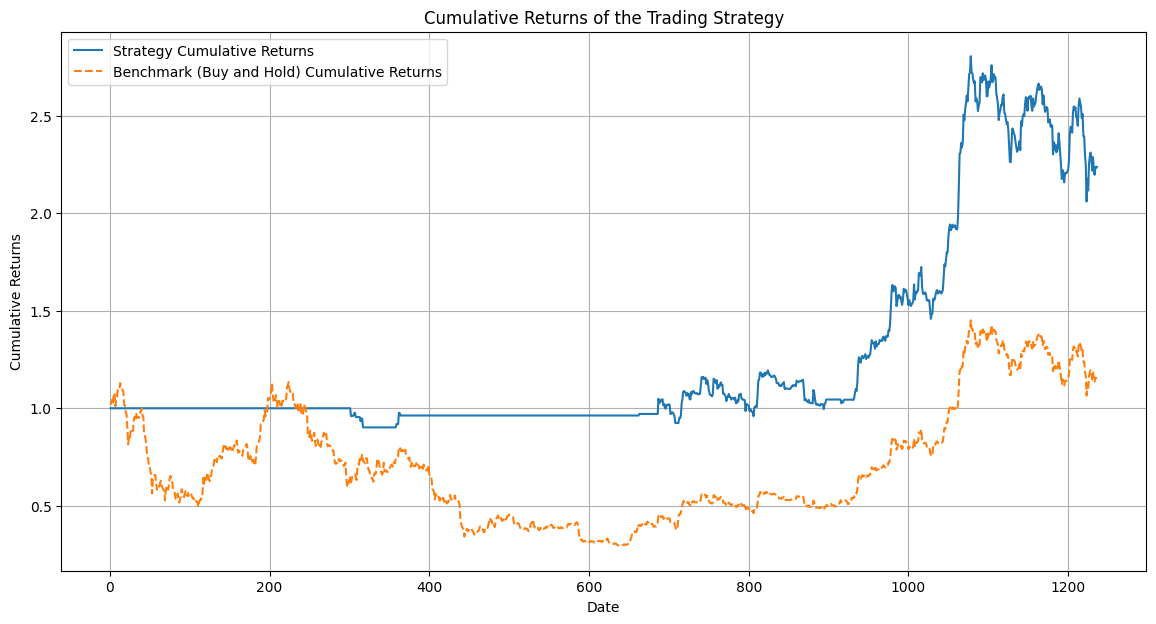

In [12]:
# momentum_list = [30, 60, 90, 120, 150, 180, 360]
momentum_list = [30, 60, 90, 120, 150, 180]
various_momentum(momentum_list=momentum_list, df=df,)